In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
data_train = pd.read_csv('train_reprocess_dropna.csv',encoding='big5')
data_test = pd.read_csv('test_reprocess_dropna.csv',encoding='big5')

In [4]:
data_train

,CUS_ID,AGE,EDUCATION_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,L1YR_B_ISSUE_CNT,LAST_B_ISSUE_DT,CHANNEL_A_POL_CNT,CHANNEL_B_POL_CNT,...,ohe_CONTACT_CITY_CD_E,ohe_CUST_9_SEGMENTS_CD_B,ohe_CUST_9_SEGMENTS_CD_C,ohe_CUST_9_SEGMENTS_CD_D,ohe_CUST_9_SEGMENTS_CD_E,ohe_CUST_9_SEGMENTS_CD_F,ohe_CUST_9_SEGMENTS_CD_G,ohe_CUST_9_SEGMENTS_CD_H,ohe_MARRIAGE_CD_1.0,ohe_MARRIAGE_CD_2.0
0,1093253,1,1.0,1,0,0,0,0,2,0,...,0,0,1,0,0,0,0,0,0,0
1,2499393,1,1.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,34455,2,3.0,1,0,1,0,0,4,0,...,0,0,0,0,0,1,0,0,0,0
3,99962,2,2.0,1,1,1,0,0,2,0,...,0,0,0,0,0,1,0,0,0,0
4,105927,2,3.0,1,2,1,0,0,20,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,2547356,4,2.0,1,1,1,0,0,12,0,...,0,0,0,0,1,0,0,0,1,0
1656,2547613,4,2.0,1,2,1,0,0,37,0,...,0,0,0,0,1,0,0,0,0,1
1657,2549271,4,3.0,1,2,1,0,0,6,0,...,0,1,0,0,0,0,0,0,1,0
1658,2551047,4,2.0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
X,y = data_train.drop(['Y1','CUS_ID'],axis=1), data_train['Y1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

lr = LogisticRegression(C=20, class_weight='balanced', random_state=1, penalty='l2', max_iter=500)
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)[:,1]

C:\Users\doggy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
stats.describe(y_pred)

DescribeResult(nobs=498, minmax=(2.577742894001115e-06, 0.9999801715573567), mean=0.2576413841739325, variance=0.10325862649207015, skewness=1.14741025633844, kurtosis=-0.11752329932585104)

In [ ]:
'''
fpr,tpr,th = roc_curve(y_test, y_pred)
thresholds = pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':th}).sort_values(by="tpr" , ascending=False)
a=thresholds['tpr'] > 0.9
b=thresholds['fpr'] < 0.5
thresholds[(a & b)]
'''

In [7]:
# y_pred_transform = pd.Series(y_pred).apply(lambda x: 1 if x > 0.5 else 0)
roc_auc_score(y_test, y_pred)

0.6109225547670473

In [ ]:
'''
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_transform)

fig, ax = plt.subplots(figsize= (5,5))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.5)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i, s=matrix[i,j], va='center', ha='center')

plt.xlabel('Predict')
plt.ylabel('True')
plt.show()   
'''

## 篩選欄位(保留係數 > 0 者)

In [8]:
org_index, col_coef, col_name = [], [], []
for index, coef in enumerate(lr.coef_[0,:]):
    if coef > 0:
        org_index.append(index)
        col_coef.append(coef)
        col_name.append(X_train.columns[index])
    else:
        pass
        
col_new = pd.DataFrame({'org_index':org_index, 'coef': col_coef, 'column':col_name})

In [9]:
data_train_filter = data_train[col_name]
data_test_filter = data_test[col_name]

In [10]:
X_filter,y_filter = data_train_filter, data_train['Y1']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_filter, y_filter, test_size=0.3, random_state=1, stratify=y)
lr = LogisticRegression(C=10, class_weight='balanced', random_state=1, penalty='l1', max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)[:,1]

C:\Users\doggy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
#y_pred_transform = pd.Series(y_pred).apply(lambda x: 1 if x > 0.5 else 0)
roc_auc_score(y_test, y_pred)

0.7975631235827665

In [ ]:
'''
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_transform)

fig, ax = plt.subplots(figsize= (5,5))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.5)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i, s=matrix[i,j], va='center', ha='center')
plt.xlabel('Predict')
plt.ylabel('True')
plt.show()   
'''

## Parameters Adjustment

In [13]:
def Adjustment_Record_Plot(df, penalty):
    warnings.filterwarnings("ignore", category=FutureWarning)
    
    #stdc = StandardScaler()
    X,y = df.drop(['Y1','CUS_ID'],axis=1), df['Y1']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    #X_train_std = stdc.fit_transform(X_train)
    #X_test_std = stdc.fit_transform(X_test)
    
    i = 10
    c ,score = [],[]
    while i < 60:
        lr = LogisticRegression(C=i, class_weight='balanced', random_state=1, penalty=penalty, max_iter=1000)
        lr.fit(X_train , y_train)
        y_pred = lr.predict_proba(X_test)[:,1]
        score.append(roc_auc_score(y_test, y_pred))
        c.append(i)
        i += 5
    
    #plot
    plt.figure(figsize=(14,6))
    plt.plot(c, score, marker='o')
    plt.ylabel('score')
    plt.xlabel('C')
    plt.title('penalty=' + penalty)
    plt.show()
    
    score_record = pd.DataFrame({"C":c , "Score":score})
    return  score_record

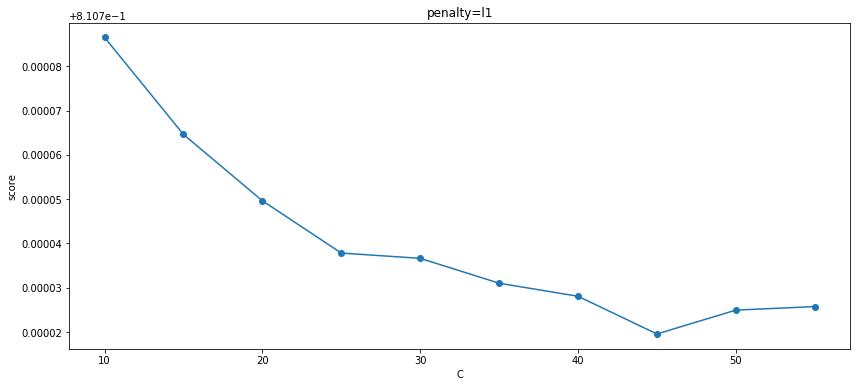

,C,Score
0,10,0.810786
1,15,0.810765
2,20,0.810750
3,25,0.810738
4,30,0.810737
5,35,0.810731
6,40,0.810728
7,45,0.810720
8,50,0.810725
9,55,0.810726


In [14]:
Adjustment_Record_Plot(data_train, penalty='l1')

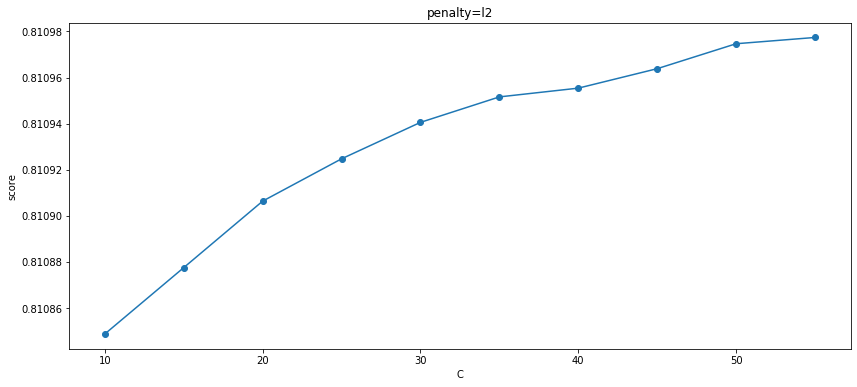

,C,Score
0,10,0.810849
1,15,0.810878
2,20,0.810906
3,25,0.810925
4,30,0.810941
5,35,0.810952
6,40,0.810955
7,45,0.810964
8,50,0.810975
9,55,0.810977


In [15]:
Adjustment_Record_Plot(data_train, penalty='l2')

In [30]:
data_train_filter_bind = pd.concat([data_train_filter, pd.DataFrame(data_train[['Y1','CUS_ID']])], axis=1)
data_train_filter_bind.shape

(100000, 85)

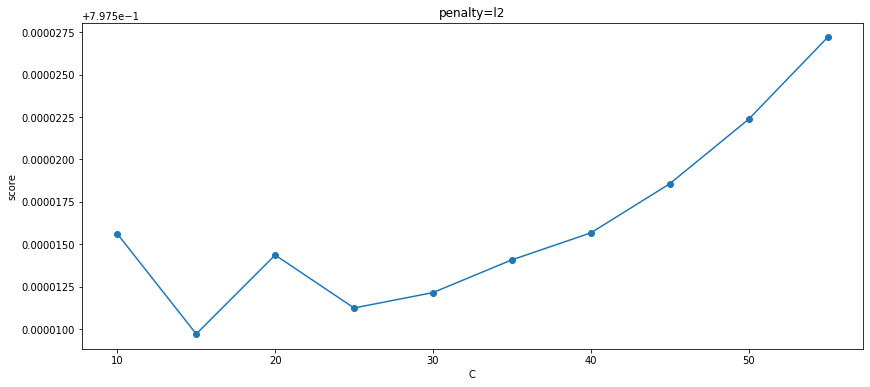

,C,Score
0,10,0.797516
1,15,0.797510
2,20,0.797514
3,25,0.797511
4,30,0.797512
5,35,0.797514
6,40,0.797516
7,45,0.797519
8,50,0.797522
9,55,0.797527


In [31]:
Adjustment_Record_Plot(data_train_filter_bind , penalty='l2')

## Feature Importance (Random Forest)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

drop_col = ['Y1','CUS_ID']
feat_labels = data_train.drop(drop_col,axis=1).columns

forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

sfm = SelectFromModel(forest, threshold=0.01, prefit=True)
X_selected = sfm.transform(X_train)

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) DIEBENEFIT_AMT                 0.036394
 2) DIEACCIDENT_AMT                0.035780
 3) INSD_LAST_YEARDIF_CNT          0.033005
 4) ANNUAL_INCOME_AMT              0.029532
 5) L1YR_GROSS_PRE_AMT             0.026776
 6) BMI                            0.025975
 7) ANNUAL_PREMIUM_AMT             0.025859
 8) TOOL_VISIT_1YEAR_CNT           0.025132
 9) APC_1ST_YEARDIF                0.023062
10) INSD_1ST_AGE                   0.018250
11) ACCIDENT_HOSPITAL_REC_AMT      0.017996
12) INPATIENT_SURGERY_AMT          0.016366
13) LIFE_INSD_CNT                  0.015965
14) EDUCATION_CD                   0.015728
15) OCCUPATION_CLASS_CD            0.015437
16) ANNUITY_AMT                    0.015376
17) CHANNEL_A_POL_CNT              0.015241
18) DISEASES_HOSPITAL_REC_AMT      0.014752
19) OUTPATIENT_SURGERY_AMT         0.014696
20) MONTHLY_CARE_AMT               0.013198
21) FIRST_CANCER_AMT               0.012826
22) AGE                            0.011986
23) IM_CNT                      

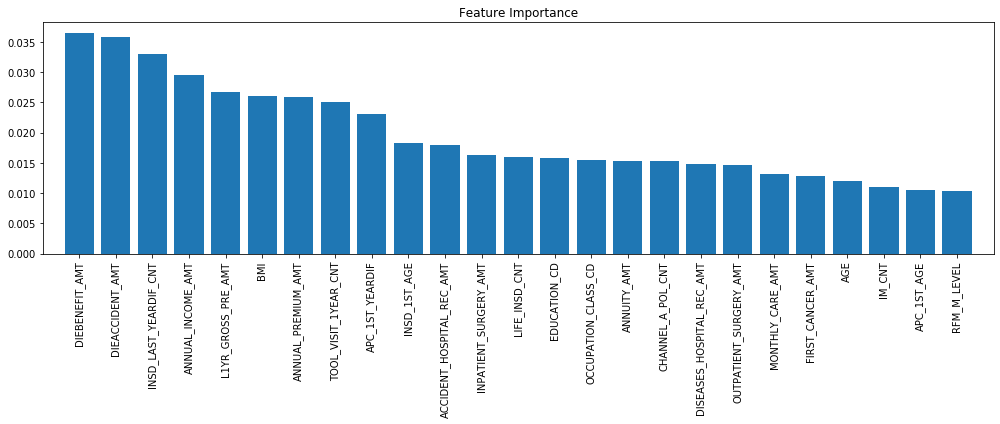

In [10]:
plt.figure(figsize=(14,6))
plt.title('Feature Importance')
plt.bar(range(X_selected.shape[1]), importances[indices[range(X_selected.shape[1])]], align='center')

plt.xticks(range(X_selected.shape[1]), feat_labels[indices[range(X_selected.shape[1])]], rotation=90)
plt.xlim([-1, X_selected.shape[1]])
plt.tight_layout()

plt.show()

In [12]:
new_col = feat_labels[indices[range(X_selected.shape[1])]]
X,y = data_train[new_col], data_train['Y1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

#stdc = StandardScaler()
#X_train_std = stdc.fit_transform(X_train)
#X_test_std = stdc.fit_transform(X_test)
    
lr = LogisticRegression(C=10, class_weight='balanced', random_state=1, penalty='l1', max_iter=1000)
lr.fit(X_train,y_train)

y_pred = pd.Series(lr.predict_proba(X_test)[:,1]).apply(lambda x: 1 if x > 0.5 else 0)
roc = roc_auc_score(y_test, y_pred)
roc

0.6992687074829932

## Correlation Coefficients

In [13]:
data_final_extraction = pd.concat([data_train[new_col], pd.DataFrame(data_train['Y1'])], axis=1)

In [14]:
data_final_extraction.corr().shape

(26, 26)

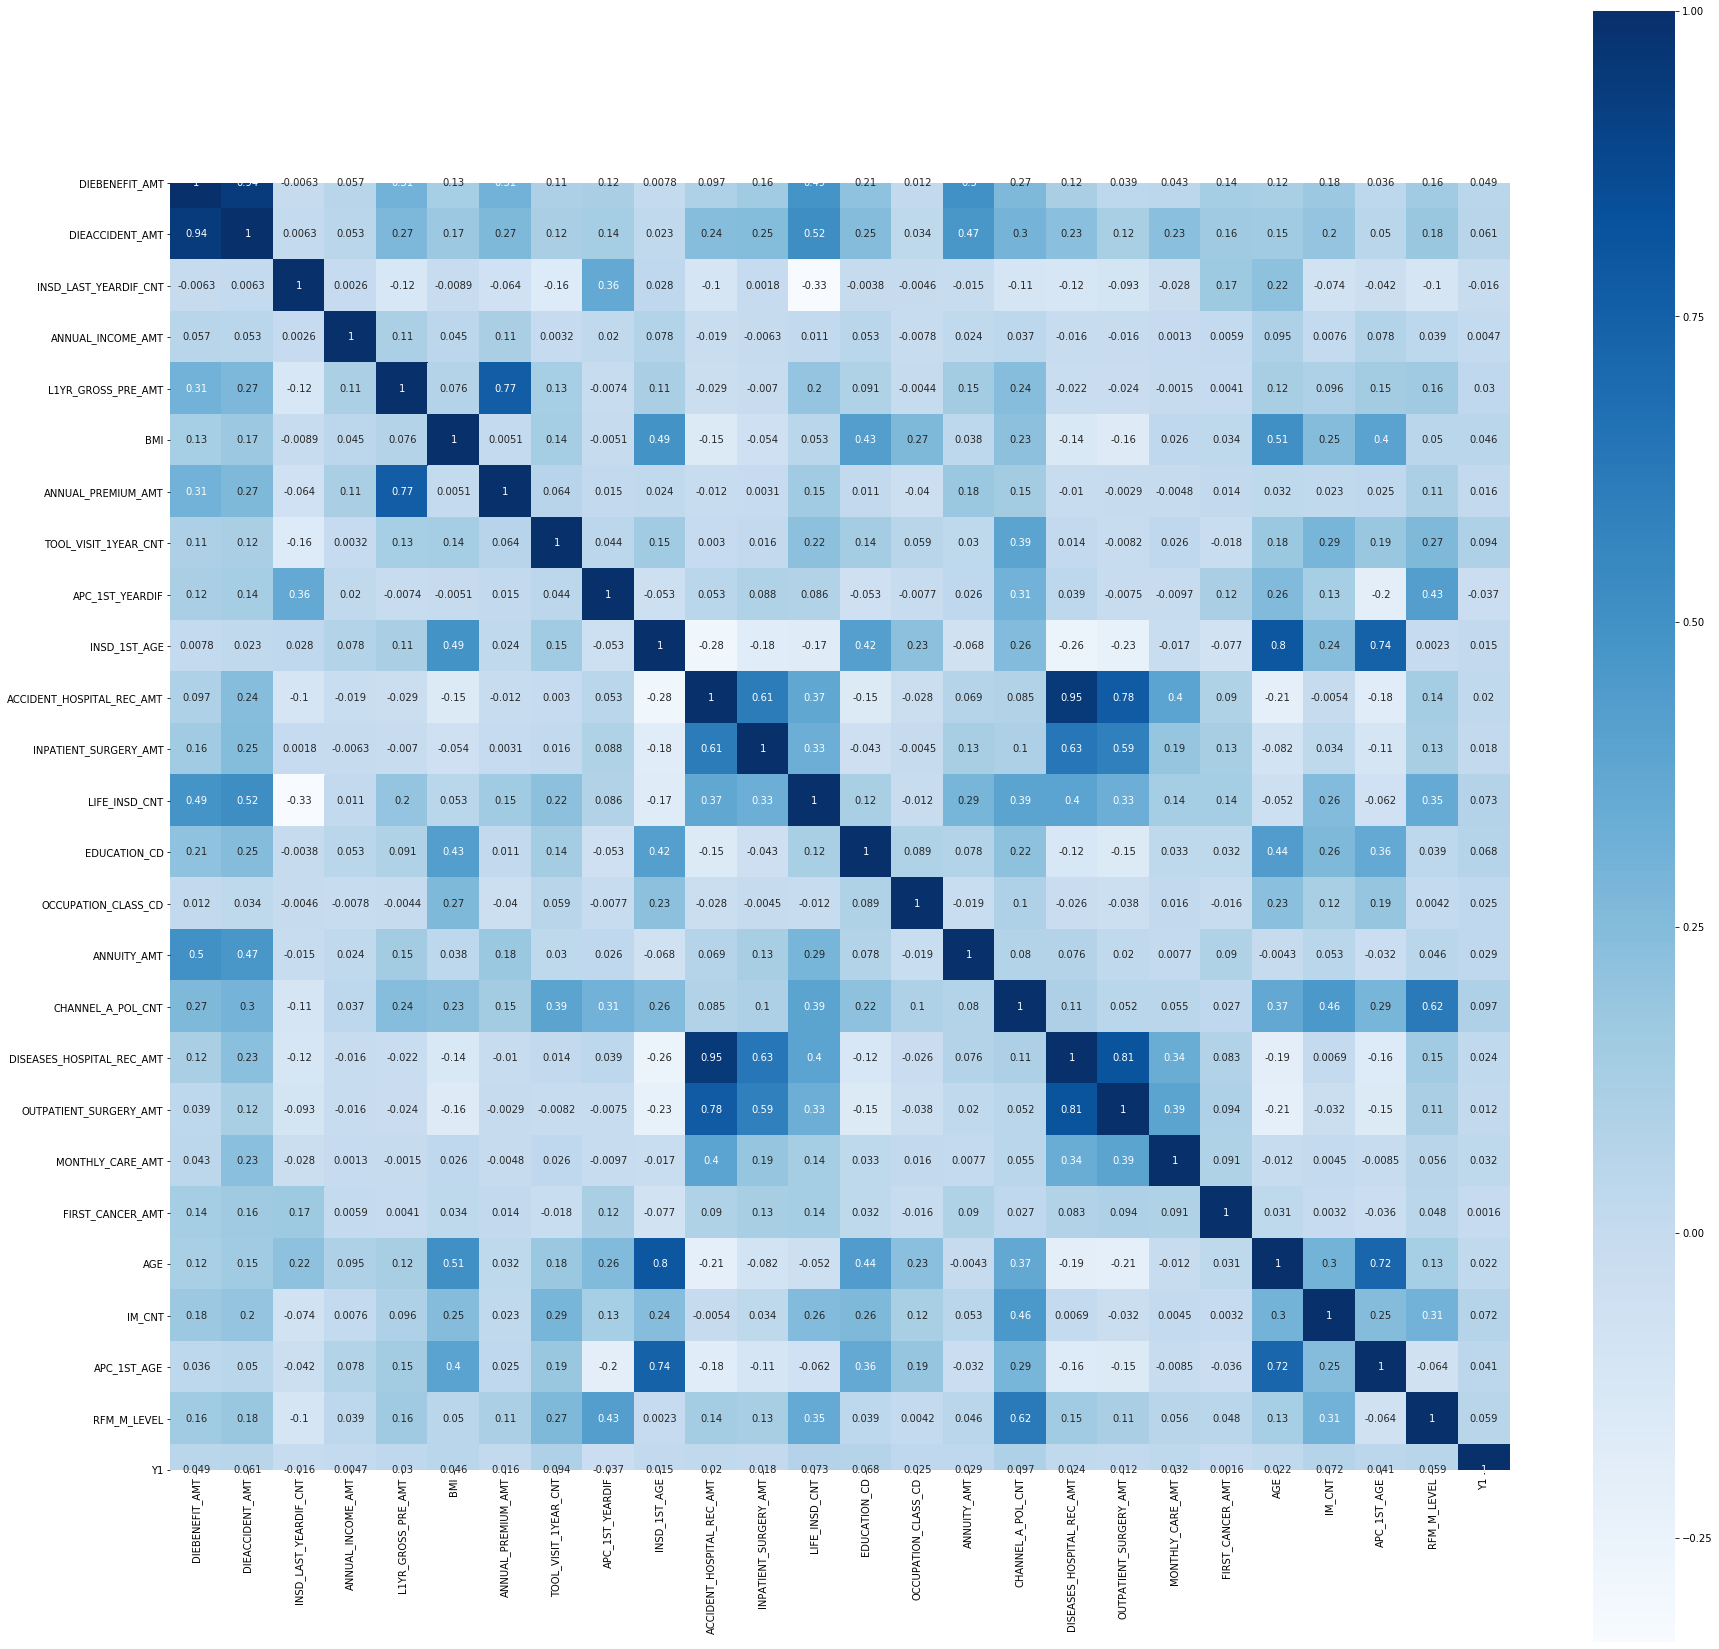

In [15]:
cor = data_final_extraction.corr()
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(cor, annot=True, vmax=1, square=True, cmap="Blues")
#plt.savefig('Relation.png')
plt.show()

## Predict Test Data

In [19]:
lr = LogisticRegression(C=10, class_weight='balanced', random_state=1, penalty='l1', max_iter=1000)
X,y = data_train.drop(['Y1','CUS_ID'],axis=1), data_train['Y1']

#stdc = StandardScaler()
#X_train_std = stdc.fit_transform(X)
#X_test_std = stdc.fit_transform(data_test)

lr.fit(X,y)
y_pred = lr.predict_proba(data_test.drop('CUS_ID',axis=1))[:,1]
y_pred_final = pd.Series(y_pred).apply(lambda x: 1 if x > 0.5 else 0)

#Submit Prediction
submit = pd.DataFrame({'CUS_ID':data_test['CUS_ID'].astype(np.int64),'Ypred':y_pred_final})
submit.to_csv('SimpleLogistic_preprocess_2.csv',index=False)

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------END

### Lookout the actually needed sample size for training (!! the evaluation method using here is "accuracy" !!)

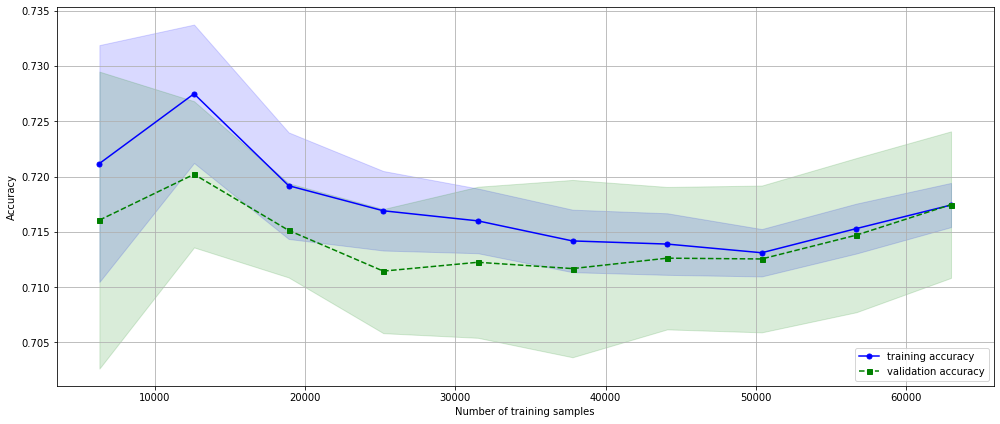

In [22]:
lr = LogisticRegression(C=10, class_weight='balanced', random_state=1, penalty='l1', max_iter=1000 )

train_sizes, train_scores, test_scores =learning_curve(estimator=lr, X=X_train, y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(14,6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()